In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Upload the data
df = pd.read_csv("FINAL.csv")
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Salary
0,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,0.543860,...,135,208,29,20,28,43,91,304,303,2582160
1,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125000,...,3,3,2,0,0,0,1,2,512,449115
2,Steven Adams,C,27,NOP,58,58,1605,189,308,0.613636,...,301,514,111,54,38,78,113,438,24,29592695
3,Bam Adebayo,C,23,MIA,64,64,2143,456,800,0.570000,...,431,573,346,75,66,169,145,1197,201,5115492
4,LaMarcus Aldridge,C,35,BRK,52,46,1348,280,592,0.472973,...,198,236,98,22,58,54,94,704,66,17628340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Delon Wright,PG,28,SAC,126,78,3496,480,1036,0.463320,...,408,538,556,202,60,166,150,1290,140,9000000
537,Thaddeus Young,PF,32,CHI,68,23,1652,370,662,0.558912,...,255,423,291,74,40,137,152,823,86,13545000
538,Trae Young,PG,22,ATL,63,63,2125,487,1112,0.437950,...,207,245,594,53,12,261,111,1594,175,6571800
539,Cody Zeller,C,28,CHO,48,21,1005,181,324,0.558642,...,209,328,86,27,17,51,121,451,76,15415730


In [3]:
df1 = df.loc[df["Pos"]=="SG"]

In [4]:
# Create the input variables
X = df1.drop(columns=["Player", "Tm", "Pos", "ID", "Salary"])

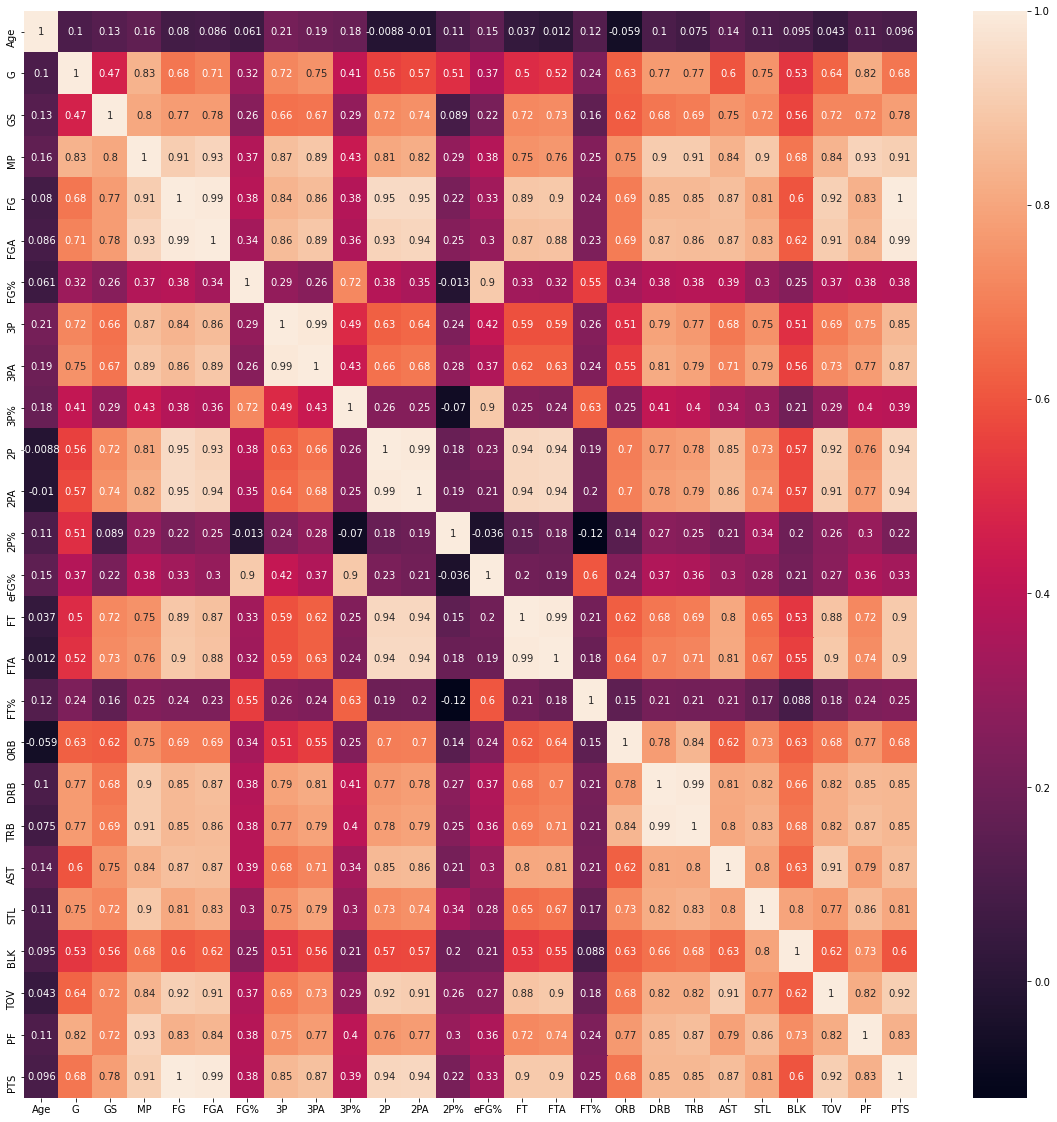

In [5]:
corrMatrix = X.corr()
plt.figure(figsize=(20, 20))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:
# Create the clustering model
#clustering = AgglomerativeClustering(n_clusters=int((len(X)/3))).fit(X)
clustering = AgglomerativeClustering(n_clusters=13).fit(X)
Counter(clustering.labels_)

Counter({11: 18,
         12: 10,
         6: 17,
         8: 7,
         1: 17,
         4: 8,
         10: 2,
         3: 9,
         2: 15,
         7: 5,
         5: 15,
         9: 2,
         0: 2})

In [7]:
df1["Label"] = clustering.labels_
df1

<ipython-input-7-2c8a5e937266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Label"] = clustering.labels_


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Salary,Label
5,Ty-Shon Alexander,SG,22,PHO,15,0,47,3,12,0.250000,...,10,6,0,1,3,2,9,512,449115,11
6,Nickeil Alexander-Walker,SG,22,NOP,46,13,1007,192,458,0.419214,...,144,102,47,22,69,88,508,282,3113160,12
7,Grayson Allen,SG,25,MEM,50,38,1259,173,414,0.417874,...,160,108,46,8,48,71,532,311,2545320,6
23,Dwayne Bacon,SG,25,ORL,72,50,1853,292,726,0.402204,...,224,93,45,5,46,103,788,391,1678854,8
28,Desmond Bane,SG,22,MEM,68,17,1519,234,499,0.468938,...,210,118,41,16,59,125,625,364,1936440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,Denzel Valentine,SG,27,CHI,62,3,1036,155,416,0.372596,...,197,105,30,7,42,70,406,220,4642800,6
499,Fred VanVleet,SG,26,TOR,52,52,1899,338,870,0.388506,...,220,328,87,37,95,119,1019,49,21250000,7
508,Lonnie Walker,SG,22,SAS,60,38,1522,256,609,0.420361,...,155,101,29,15,65,101,669,290,2895720,1
516,Quinndary Weatherspoon,SG,24,SAS,20,0,121,16,35,0.457143,...,11,8,8,2,10,18,46,512,449115,11


In [8]:
df1.loc[df1["Label"]==3]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Salary,Label
49,Eric Bledsoe,SG,31,NOP,71,70,2111,307,730,0.420548,...,244,268,55,24,114,112,869,70,16875000,3
86,Kentavious Caldwell-Pope,SG,27,LAL,67,67,1902,218,506,0.430830,...,179,127,62,26,66,114,653,105,12073020,3
128,Donte DiVincenzo,SG,24,MIL,66,66,1814,253,603,0.419569,...,380,203,72,15,91,112,688,284,3044160,3
203,Gary Harris,SG,26,ORL,78,76,2160,276,690,0.400000,...,158,156,56,22,74,142,776,54,19610714,3
224,Justin Holiday,SG,31,IND,72,52,2183,258,625,0.412800,...,256,119,74,41,54,135,756,187,5720400,3
233,Kevin Huerter,SG,22,ATL,69,49,2126,316,731,0.432285,...,231,241,82,18,79,165,822,295,2761920,3
337,Ben McLemore,SG,27,LAL,106,10,1810,270,730,0.369863,...,200,78,46,18,84,176,812,291,2893630,3
382,Isaac Okoro,SG,20,CLE,67,67,2173,235,559,0.420394,...,206,128,62,24,86,185,646,179,6400920,3
428,Josh Richardson,SG,27,DAL,59,56,1790,264,618,0.427184,...,195,153,61,24,79,130,715,114,10865952,3


In [10]:
player_label = df1.loc[df1["Player"]=="Eric Bledsoe"]["Label"].values[0]
player_label

3

In [11]:
output = df1.loc[df1["Label"]==player_label].reset_index().drop(columns=["index"])
output

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Salary,Label
0,Eric Bledsoe,SG,31,NOP,71,70,2111,307,730,0.420548,...,244,268,55,24,114,112,869,70,16875000,3
1,Kentavious Caldwell-Pope,SG,27,LAL,67,67,1902,218,506,0.430830,...,179,127,62,26,66,114,653,105,12073020,3
2,Donte DiVincenzo,SG,24,MIL,66,66,1814,253,603,0.419569,...,380,203,72,15,91,112,688,284,3044160,3
3,Gary Harris,SG,26,ORL,78,76,2160,276,690,0.400000,...,158,156,56,22,74,142,776,54,19610714,3
4,Justin Holiday,SG,31,IND,72,52,2183,258,625,0.412800,...,256,119,74,41,54,135,756,187,5720400,3
5,Kevin Huerter,SG,22,ATL,69,49,2126,316,731,0.432285,...,231,241,82,18,79,165,822,295,2761920,3
6,Ben McLemore,SG,27,LAL,106,10,1810,270,730,0.369863,...,200,78,46,18,84,176,812,291,2893630,3
7,Isaac Okoro,SG,20,CLE,67,67,2173,235,559,0.420394,...,206,128,62,24,86,185,646,179,6400920,3
8,Josh Richardson,SG,27,DAL,59,56,1790,264,618,0.427184,...,195,153,61,24,79,130,715,114,10865952,3


In [ ]:
for index, row in output.iterrows():
    print(row["Player"], index)